In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin, freqz
from funcoes import fft_dec, zero_padding, overlap_add

# Análise do Sinal (Alicar a FFT para Identificar Componentes)

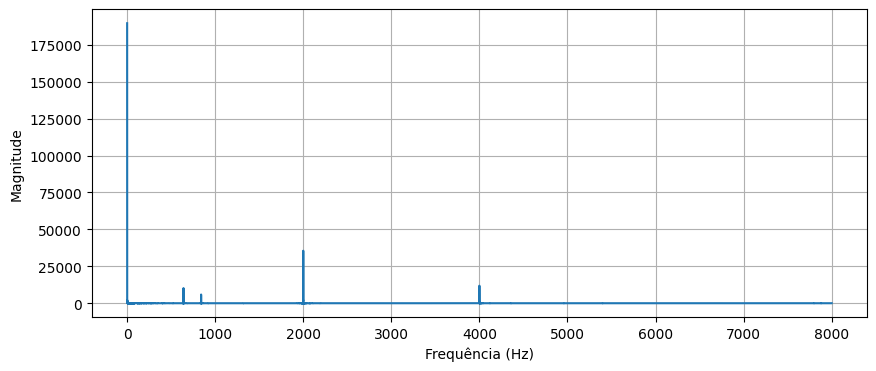

In [76]:
# Carregar o sinal
fs, x = wavfile.read('sinal_1.wav')  # fs = 16 kHz (taxa de amostragem)
x = x / np.max(np.abs(x))  # Normaliza o sinal

# FFT
x = zero_padding(x)
X = fft_dec(x)
N = len(x)
freqs = np.fft.fftfreq(N, d=1/fs)
freqs_pos = freqs[:N//2] # Frequências positivas (0 a fs/2)
magnitude = np.abs(X[:N//2])

plt.figure(figsize=(10, 4))
plt.plot(freqs_pos, magnitude)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
#plt.xlim([500, 1000])
plt.grid(True)
plt.show()

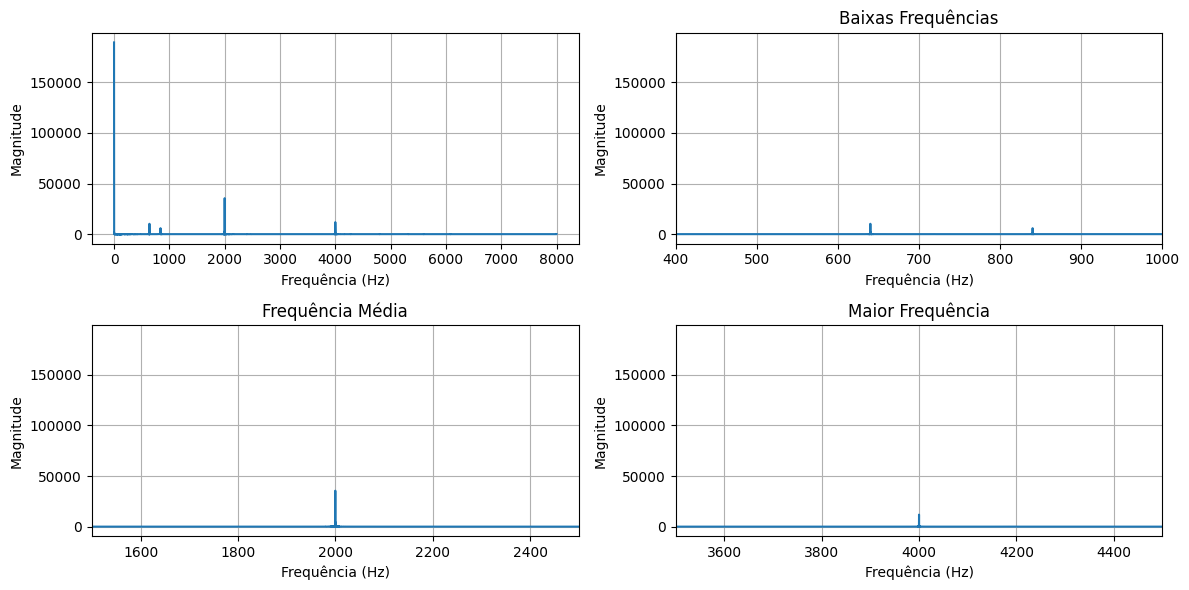

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs[0, 0].plot(freqs_pos, magnitude)
axs[0, 0].set_xlabel('Frequência (Hz)')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].grid(True)

axs[0, 1].plot(freqs_pos, magnitude)
axs[0, 1].set_xlabel('Frequência (Hz)')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_title('Baixas Frequências')
axs[0, 1].grid(True)
axs[0, 1].set_xlim([400, 1000])
#axs[0, 1].set_ylim([0, 5000])

axs[1, 0].plot(freqs_pos, magnitude)
axs[1, 0].set_xlabel('Frequência (Hz)')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].set_title('Frequência Média')
axs[1, 0].grid(True)
axs[1, 0].set_xlim([1500, 2500])

axs[1, 1].plot(freqs_pos, magnitude)
axs[1, 1].set_xlabel('Frequência (Hz)')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_title('Maior Frequência')
axs[1, 1].grid(True)
axs[1, 1].set_xlim([3500, 4500])


plt.tight_layout()
plt.show()

# Projeto dos Filtros FIR para Separar as Componentes

- Filtro DC

![passaalta](img/high_pass_DC.png)

<StemContainer object of 3 artists>

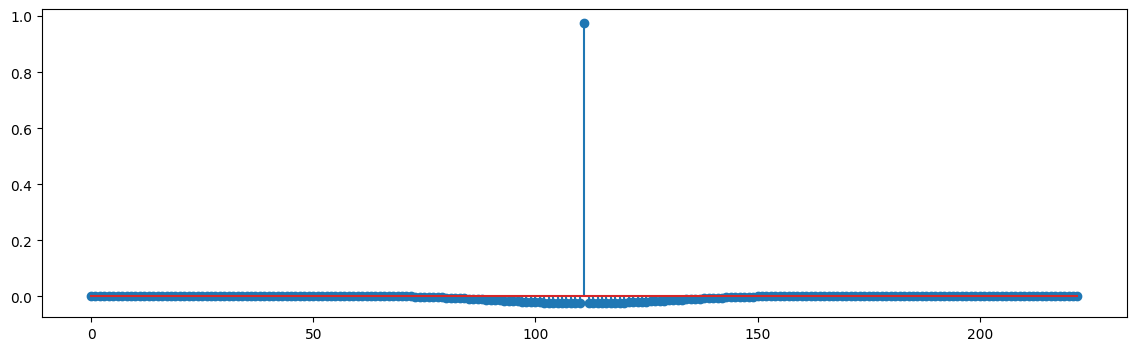

In [79]:
h_highpass = np.array([2.7751835551814708e-11,-1.4752761501313216e-07,-6.410580226656748e-07,-1.5510941011598334e-06,-2.939306341431802e-06,-4.857071871811058e-06,-7.344247023866046e-06,-1.0427461347717326e-05,-1.4119125808065291e-05,-1.8415383237879723e-05,-2.329572271264624e-05,-2.8720567570417188e-05,-3.463084067334421e-05,-4.094672840437852e-05,-4.7566161811118945e-05,-5.436452920548618e-05,-6.119385943748057e-05,-6.788255996070802e-05,-7.423484930768609e-05,-8.003136463230476e-05,-8.502983109792694e-05,-8.89654183993116e-05,-9.155279258266091e-05,-9.248741116607562e-05,-9.144814248429611e-05,-8.81001542438753e-05,-8.20980203570798e-05,-7.308997737709433e-05,-6.072211908758618e-05,-4.464363883016631e-05,-2.451218642818276e-05,8.359826543759015e-20,2.9199602067819797e-05,6.336532533168793e-05,0.00010274058149661869,0.00014752593415323645,0.00019787134078796953,0.00025386831839568913,0.0003155417216476053,0.00038284240872599185,0.00045563900494016707,0.0005337109323590994,0.0006167413666844368,0.0007043113000690937,0.0007958931964822114,0.0008908464224077761,0.000988413579761982,0.001087718177586794,0.0011877616634592414,0.0012874237727373838,0.0013854646822437644,0.0014805254759266973,0.001571133267134428,0.0016557070193812251,0.0017325648805126548,0.0017999319825321436,0.0018559518503025174,0.0018986990908160806,0.0019261911511421204,0.0019364053150638938,0.0019272944191470742,0.0018968050135299563,0.0018428959883749485,0.0017635587137192488,0.0016568376449868083,0.001520852674730122,0.001353819272480905,0.001154072000645101,0.0009200860513374209,0.0006504979101009667,0.000344127940479666,-5.664471830192958e-19,-0.0003826391766779125,-0.0008043021080084145,-0.001265243743546307,-0.0017654479015618563,-0.0023046121932566166,-0.0028821409214287996,-0.003497135126963258,-0.004148385487496853,-0.004834374878555536,-0.005553270690143108,-0.006302936933934689,-0.007080928888171911,-0.007884513586759567,-0.008710680529475212,-0.009556141681969166,-0.01041737012565136,-0.01129060611128807,-0.012171885930001736,-0.01305706799030304,-0.013941855169832706,-0.014821836724877357,-0.01569250412285328,-0.01654929667711258,-0.01738762855529785,-0.018202928826212883,-0.01899067312479019,-0.01974642090499401,-0.020465856418013573,-0.021144811064004898,-0.021779311820864677,-0.022365601733326912,-0.022900184616446495,-0.023379838094115257,-0.023801662027835846,-0.024163078516721725,-0.02446187287569046,-0.02469620481133461,-0.02486463077366352,-0.024966107681393623,0.9750000238418579,-0.024966107681393623,-0.02486463077366352,-0.02469620481133461,-0.02446187287569046,-0.024163078516721725,-0.023801662027835846,-0.023379838094115257,-0.022900182753801346,-0.022365601733326912,-0.021779311820864677,-0.021144811064004898,-0.020465856418013573,-0.01974642090499401,-0.01899067312479019,-0.018202926963567734,-0.01738762855529785,-0.01654929667711258,-0.01569250412285328,-0.014821836724877357,-0.013941856101155281,-0.01305706612765789,-0.012171884998679161,-0.01129060611128807,-0.01041737012565136,-0.009556141681969166,-0.008710680529475212,-0.007884514518082142,-0.007080928888171911,-0.006302935071289539,-0.005553270690143108,-0.004834374878555536,-0.00414838595315814,-0.003497135126963258,-0.0028821409214287996,-0.0023046121932566166,-0.0017654475523158908,-0.0012652436271309853,-0.0008043019915930927,-0.00038263911847025156,-5.664470796217192e-19,0.00034412796958349645,0.0006504979683086276,0.0009200862259604037,0.0011540724663063884,0.0013538193888962269,0.001520852791145444,0.001656837877817452,0.0017635584808886051,0.0018428957555443048,0.0018968048971146345,0.0019272941863164306,0.0019364049658179283,0.0019261905690655112,0.0018986986251547933,0.001855951501056552,0.0017999326810240746,0.001732565462589264,0.0016557074850425124,0.0015711336163803935,0.001480525708757341,0.0013854647986590862,0.0012874238891527057,0.0011877615470439196,0.001087718061171472,0.000988413579761982,0.0008908461895771325,0.0007958929054439068,0.0007043110090307891,0.0006167411920614541,0.0005337111069820821,0.00045563915045931935,0.00038284255424514413,0.00031554180895909667,0.00025386837660335004,0.00019787138444371521,0.00014752593415323645,0.00010274058149661869,6.33653107797727e-05,2.9199607524788007e-05,8.359825897524162e-20,-2.4512184609193355e-05,-4.464361700229347e-05,-6.072208998375572e-05,-7.30899118934758e-05,-8.209806401282549e-05,-8.81002051755786e-05,-9.144821524387226e-05,-9.248744026990607e-05,-9.155282896244898e-05,-8.89654693310149e-05,-8.502983109792694e-05,-8.003136463230476e-05,-7.423477654810995e-05,-6.788251630496234e-05,-6.119381578173488e-05,-5.4364481911761686e-05,-4.756603084388189e-05,-4.094662290299311e-05,-3.4630960726644844e-05,-2.8720591217279434e-05,-2.329577000637073e-05,-1.8415452359477058e-05,-1.4119103980192449e-05,-1.0427461347717326e-05,-7.344226560235256e-06,-4.857071871811058e-06,-2.939306341431802e-06,-1.5510941011598334e-06,-6.410580226656748e-07,-1.4752761501313216e-07,2.7751835551814708e-11])
# ordem n = 223
plt.figure(figsize=(14, 4))
plt.stem(h_highpass)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16140\688863384.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


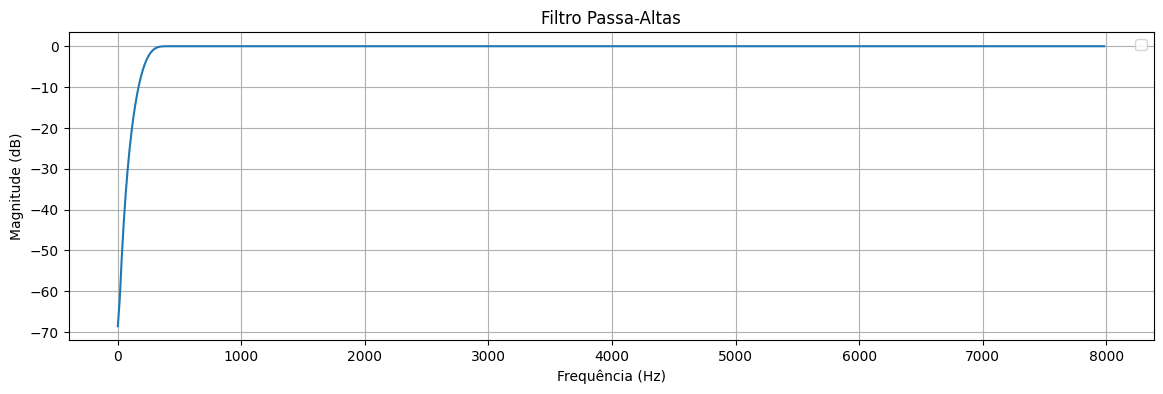

In [80]:
# Resposta em frequência
plt.figure(figsize=(14, 4)) 
w, H = freqz(h_highpass, fs=fs)
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Filtro Passa-Altas')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16140\3787214592.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


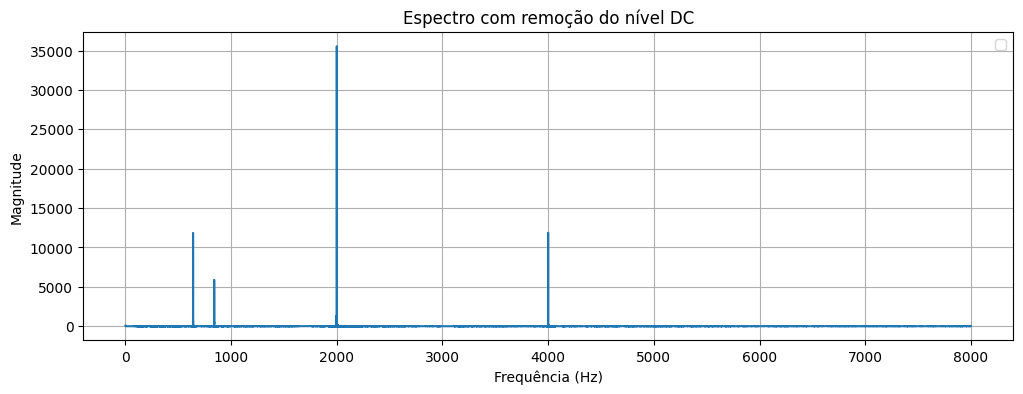

In [81]:
x_sem_dc = overlap_add(x, h_highpass)
x_sem_dc = zero_padding(x_sem_dc)

X_sem_dc = fft_dec(x_sem_dc)
N = len(x_sem_dc)
freqs = np.fft.fftfreq(N, d=1/fs)
freqs_pos = freqs[:N//2]
magnitude = np.abs(X_sem_dc[:N//2])

plt.figure(figsize=(12, 4))
plt.plot(freqs_pos, magnitude)
plt.title('Espectro com remoção do nível DC')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Filtro para 640 Hz

![h1](img/h1.png)


<StemContainer object of 3 artists>

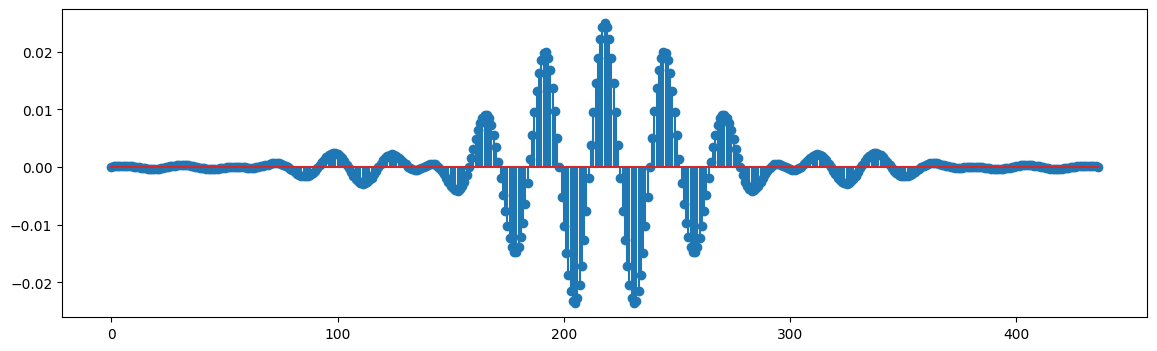

In [82]:
h1 = np.array([8.049832831602544e-05,0.00011954734509345144,0.00015440044808201492,0.00018260029901284724,0.00020195335673633963,0.0002106813044520095,0.00020755481091327965,0.00019200026872567832,0.0001641725975787267,0.00012498698197305202,7.610618195030838e-05,1.988096846616827e-05,-4.0755221561994404e-05,-0.00010243403085041791,-0.00016153568867594004,-0.00021439923148136586,-0.00025754774105735123,-0.00028791543445549905,-0.00030306197004392743,-0.00030135910492390394,-0.0002821359666995704,-0.0002457702939864248,-0.00019371655071154237,-0.00012846487516071647,-5.342926669982262e-05,2.7231302738073282e-05,0.0001088506614905782,0.0001865389058366418,0.0002554944367147982,0.000311323965433985,0.00035034873872064054,0.0003698734799399972,0.00036839829408563673,0.00034575400059111416,0.00030314861214719713,0.00024311704328283668,0.00016937335021793842,8.657323633087799e-05,2.885851242086237e-20,-8.480449469061568e-05,-0.0001624381693545729,-0.00022803660249337554,-0.0002776395413093269,-0.00030849597533233464,-0.0003192814765498042,-0.0003102072805631906,-0.0002830082084983587,-0.00024080627190414816,-0.00018785636348184198,-0.00012919085565954447,-7.018907490419224e-05,-1.610496110515669e-05,2.8408592697815038e-05,5.973769293632358e-05,7.566829299321398e-05,7.563467806903645e-05,6.082823529141024e-05,3.4149637940572575e-05,-2.252240909510848e-19,-3.6079676647204906e-05,-6.789786857552826e-05,-8.91953386599198e-05,-9.427553595742211e-05,-7.863010978326201e-05,-3.950341488234699e-05,2.36578744079452e-05,0.00010891831334447488,0.0002117677213391289,0.0003252587921451777,0.0004403736675158143,0.0005466066068038344,0.0006327299051918089,0.000687693536747247,0.0007015934097580612,0.0006666340050287545,0.0005780044593848288,0.00043459038715809584,0.00023945032444316894,-3.3532998338080528e-18,-0.0002721326891332865,-0.0005615960108116269,-0.000850133306812495,-0.0011176924454048276,-0.0013437621528282762,-0.0015088464133441448,-0.001595976296812296,-0.001592143322341144,-0.0014895453350618482,-0.001286533079110086,-0.0009881739970296621,-0.0006063621258363128,-0.00015944275946822017,0.00032865063985809684,0.0008297106833197176,0.001312950043939054,0.0017469713930040598,0.002101882826536894,0.00235141534358263,0.0024748852010816336,0.0024588548112660646,0.0022983578965067863,0.001997582381591201,0.0015699403593316674,0.0010374946286901832,0.00042976229451596737,-0.0002180447627324611,-0.000867230526637286,-0.0014781347708776593,-0.0020127894822508097,-0.002437521703541279,-0.0027253173757344484,-0.002857763320207596,-0.002826419658958912,-0.0026335075963288546,-0.0022918488830327988,-0.0018240431090816855,-0.0012609312543645501,-0.0006394465453922749,2.5375094982898803e-18,0.0006164104561321437,0.0011711525730788708,0.0016307526966556907,0.0019693123176693916,0.002170358318835497,0.002227974124252796,0.0021471146028488874,0.001943065319210291,0.001640081638470292,0.001269294647499919,0.0008660477469675243,0.00046686644782312214,0.00010630161705194041,-0.0001860952761489898,-0.0003884113975800574,-0.000488395569846034,-0.0004846775555051863,-0.0003870570508297533,-0.00021580455359071493,7.068612470965371e-19,0.00022498838370665908,0.00042070544441230595,0.0005492470809258521,0.0005770460702478886,0.0004784878983628005,0.0002390424197074026,-0.0001423851354047656,-0.0006521258037537336,-0.0012616169406101108,-0.0019285565940663218,-0.0025993294548243284,-0.0032125895377248526,-0.0037037828005850315,-0.00401031319051981,-0.004076966550201178,-0.0038612023927271366,-0.0033378582447767258,-0.002502877963706851,-0.001375695806927979,3.450548149703462e-18,0.0015572907868772745,0.003208890790119767,0.004851753823459148,0.006373205222189426,0.007658243179321289,0.008597551845014095,0.009095692075788975,0.009078889153897762,0.008501829579472542,0.007352931424975395,0.005657603032886982,0.0034791708458215,0.0009172445861622691,-0.001896491157822311,-0.0048049213364720345,-0.007634254172444344,-0.010204404592514038,-0.012340371496975422,-0.013883911073207855,-0.014704708009958267,-0.014710296876728535,-0.013853992335498333,-0.01214022096246481,-0.009626778773963451,-0.0064237420447170734,-0.0026889436412602663,0.0013798034051433206,0.005555375479161739,0.009594308212399483,0.013251316733658314,0.016294464468955994,0.018520059064030647,0.01976625621318817,0.019924508407711983,0.018948029726743698,0.016856636852025986,0.013737590983510017,0.00974223017692566,0.005078542046248913,-3.4603636816471694e-18,-0.00520869018509984,-0.010248121805489063,-0.014821993187069893,-0.018655117601156235,-0.02151046320796013,-0.023204220458865166,-0.023617805913090706,-0.02270612120628357,-0.0205013919621706,-0.017112361267209053,-0.01271878182888031,-0.007561494596302509,-0.0019286975730210543,0.0038608291652053595,0.009476495906710625,0.014595544897019863,0.018922336399555206,0.022206101566553116,0.024256054311990738,0.024952897801995277,0.024256054311990738,0.022206101566553116,0.018922336399555206,0.014595544897019863,0.009476495906710625,0.0038608291652053595,-0.0019286975730210543,-0.007561494596302509,-0.01271878182888031,-0.017112361267209053,-0.0205013919621706,-0.02270612120628357,-0.023617805913090706,-0.023204220458865166,-0.02151046320796013,-0.018655117601156235,-0.014821993187069893,-0.010248121805489063,-0.00520869018509984,-3.4603636816471694e-18,0.005078542046248913,0.00974223017692566,0.013737590983510017,0.016856636852025986,0.018948029726743698,0.019924508407711983,0.01976625621318817,0.018520059064030647,0.016294464468955994,0.013251316733658314,0.009594308212399483,0.005555375479161739,0.0013798034051433206,-0.0026889436412602663,-0.0064237420447170734,-0.009626778773963451,-0.01214022096246481,-0.013853992335498333,-0.014710296876728535,-0.014704708009958267,-0.013883911073207855,-0.012340371496975422,-0.010204404592514038,-0.007634254172444344,-0.0048049213364720345,-0.001896491157822311,0.0009172445861622691,0.0034791708458215,0.005657603032886982,0.007352931424975395,0.008501829579472542,0.009078889153897762,0.009095692075788975,0.008597551845014095,0.007658243179321289,0.006373205222189426,0.004851753823459148,0.003208890790119767,0.0015572907868772745,3.450548149703462e-18,-0.001375695806927979,-0.002502877963706851,-0.0033378582447767258,-0.0038612023927271366,-0.004076966550201178,-0.00401031319051981,-0.0037037828005850315,-0.0032125895377248526,-0.0025993294548243284,-0.0019285565940663218,-0.0012616169406101108,-0.0006521258037537336,-0.0001423851354047656,0.0002390424197074026,0.0004784878983628005,0.0005770460702478886,0.0005492470809258521,0.00042070544441230595,0.00022498838370665908,7.068612470965371e-19,-0.00021580455359071493,-0.0003870570508297533,-0.0004846775555051863,-0.000488395569846034,-0.0003884113975800574,-0.0001860952761489898,0.00010630161705194041,0.00046686644782312214,0.0008660477469675243,0.001269294647499919,0.001640081638470292,0.001943065319210291,0.0021471146028488874,0.002227974124252796,0.002170358318835497,0.0019693123176693916,0.0016307526966556907,0.0011711525730788708,0.0006164104561321437,2.5375094982898803e-18,-0.0006394465453922749,-0.0012609312543645501,-0.0018240431090816855,-0.0022918488830327988,-0.0026335075963288546,-0.002826419658958912,-0.002857763320207596,-0.0027253173757344484,-0.002437521703541279,-0.0020127894822508097,-0.0014781347708776593,-0.000867230526637286,-0.0002180447627324611,0.00042976229451596737,0.0010374946286901832,0.0015699403593316674,0.001997582381591201,0.0022983578965067863,0.0024588548112660646,0.0024748852010816336,0.00235141534358263,0.002101882826536894,0.0017469713930040598,0.001312950043939054,0.0008297106833197176,0.00032865063985809684,-0.00015944275946822017,-0.0006063621258363128,-0.0009881739970296621,-0.001286533079110086,-0.0014895453350618482,-0.001592143322341144,-0.001595976296812296,-0.0015088464133441448,-0.0013437621528282762,-0.0011176924454048276,-0.000850133306812495,-0.0005615960108116269,-0.0002721326891332865,-3.3532998338080528e-18,0.00023945032444316894,0.00043459038715809584,0.0005780044593848288,0.0006666340050287545,0.0007015934097580612,0.000687693536747247,0.0006327299051918089,0.0005466066068038344,0.0004403736675158143,0.0003252587921451777,0.0002117677213391289,0.00010891831334447488,2.36578744079452e-05,-3.950341488234699e-05,-7.863010978326201e-05,-9.427553595742211e-05,-8.91953386599198e-05,-6.789786857552826e-05,-3.6079676647204906e-05,-2.252240909510848e-19,3.4149637940572575e-05,6.082823529141024e-05,7.563467806903645e-05,7.566829299321398e-05,5.973769293632358e-05,2.8408592697815038e-05,-1.610496110515669e-05,-7.018907490419224e-05,-0.00012919085565954447,-0.00018785636348184198,-0.00024080627190414816,-0.0002830082084983587,-0.0003102072805631906,-0.0003192814765498042,-0.00030849597533233464,-0.0002776395413093269,-0.00022803660249337554,-0.0001624381693545729,-8.480449469061568e-05,2.885851242086237e-20,8.657323633087799e-05,0.00016937335021793842,0.00024311704328283668,0.00030314861214719713,0.00034575400059111416,0.00036839829408563673,0.0003698734799399972,0.00035034873872064054,0.000311323965433985,0.0002554944367147982,0.0001865389058366418,0.0001088506614905782,2.7231302738073282e-05,-5.342926669982262e-05,-0.00012846487516071647,-0.00019371655071154237,-0.0002457702939864248,-0.0002821359666995704,-0.00030135910492390394,-0.00030306197004392743,-0.00028791543445549905,-0.00025754774105735123,-0.00021439923148136586,-0.00016153568867594004,-0.00010243403085041791,-4.0755221561994404e-05,1.988096846616827e-05,7.610618195030838e-05,0.00012498698197305202,0.0001641725975787267,0.00019200026872567832,0.00020755481091327965,0.0002106813044520095,0.00020195335673633963,0.00018260029901284724,0.00015440044808201492,0.00011954734509345144,8.049832831602544e-05])

# filtro de ordem n = 437
plt.figure(figsize=(14, 4))
plt.stem(h1)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16140\550508081.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


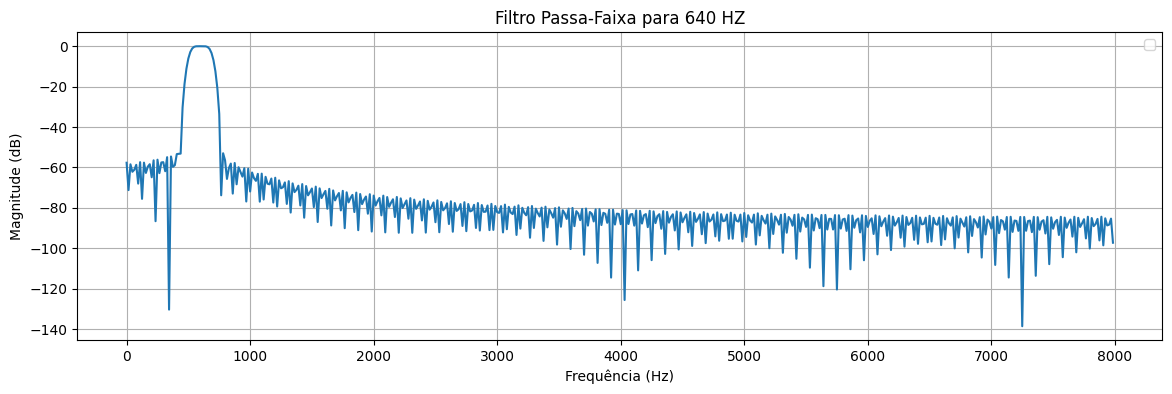

In [83]:
# Resposta em frequência
plt.figure(figsize=(14, 4))
w, H = freqz(h1, fs=fs)
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Filtro Passa-Faixa para 640 HZ')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.xlim([0,1000])
plt.grid(True)
plt.legend()
plt.show()

# Filtro para 840 Hz

![h2](img/h2.png)

<StemContainer object of 3 artists>

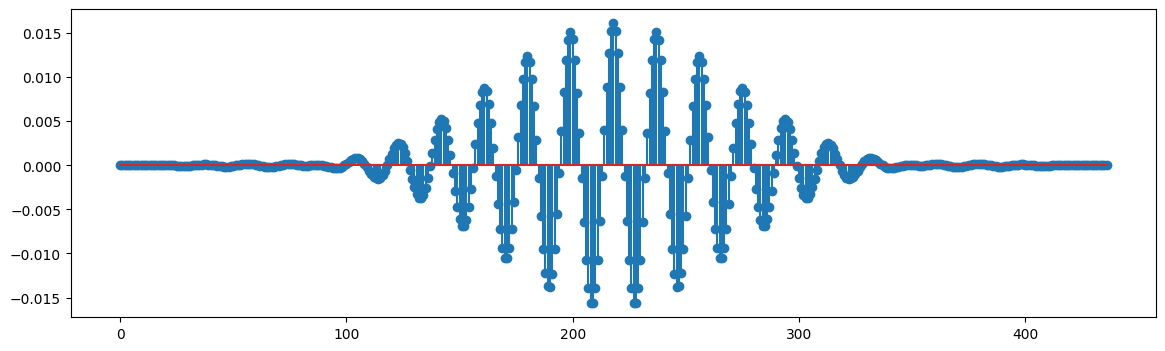

In [84]:
h2 = np.array([-4.009506268665142e-11,4.2297479296848906e-08,1.1797285992543038e-07,1.1729630244872169e-07,-8.520594718675056e-08,-5.898726840314339e-07,-1.4310071492218412e-06,-2.54558017331874e-06,-3.7600409541482804e-06,-4.80082826470607e-06,-5.330532985681202e-06,-5.006314495403785e-06,-3.5517275591701036e-06,-8.315639661304886e-07,3.085672005909146e-06,7.890464075899217e-06,1.3031728485657368e-05,1.7759268303052522e-05,2.120876160915941e-05,2.252201556984801e-05,2.0987707102904096e-05,1.618337228137534e-05,8.094887562037911e-06,-2.807332975862664e-06,-1.555517883389257e-05,-2.8742351787514053e-05,-4.0658676880411804e-05,-4.9488207878312096e-05,-5.355135363060981e-05,-5.156009501661174e-05,-4.285175236873329e-05,-2.7565532946027815e-05,-6.72833766657277e-06,1.777039324224461e-05,4.332573735155165e-05,6.687809218419716e-05,8.526405872544274e-05,9.561909246258438e-05,9.578222670825198e-05,8.464789425488561e-05,6.241320807021111e-05,3.067802754230797e-05,-7.6291685218166094e-06,-4.8504436563234776e-05,-8.728207467356697e-05,-0.00011916762741748244,-0.00013982922246214002,-0.00014597491826862097,-0.00013583904365077615,-0.00010950815340038389,-6.903304893057793e-05,-1.8298822396900505e-05,3.734642450581305e-05,9.166965173790231e-05,0.00013827579095959663,0.00017138929979410022,0.00018659689521882683,0.0001814525603549555,0.0001558601070428267,0.00011217347491765395,5.498855534824543e-05,-9.35840216698125e-06,-7.353207911364734e-05,-0.00013009044050704688,-0.0001724160829326138,-0.00019556419283617288,-0.0001969117292901501,-0.00017651522648520768,-0.00013711997598875314,-8.38117630337365e-05,-2.3347829483100213e-05,3.674637264339253e-05,8.919536776375026e-05,0.00012796548253390938,0.0001490882714278996,0.00015119314775802195,0.0001356641441816464,0.00010638801177265123,6.911970558576286e-05,3.054992339457385e-05,-2.7921905711991712e-06,-2.563659472798463e-05,-3.489692971925251e-05,-3.026609010703396e-05,-1.4368441952683497e-05,7.583677870570682e-06,2.8607480999198742e-05,4.114325565751642e-05,3.845889659714885e-05,1.605333818588406e-05,-2.7171872716280632e-05,-8.818843343760818e-05,-0.0001597310183569789,-0.000230888239457272,-0.00028838266734965146,-0.0003184197412338108,-0.00030888646142557263,-0.0002516015665605664,-0.0001442802167730406,8.122106919472571e-06,0.0001929659629240632,0.00039056502282619476,0.0005759474588558078,0.0007216287194751203,0.0008011248428374529,0.0007927984115667641,0.0006835420499555767,0.0004717618867289275,0.00016917134053073823,-0.00019899258040823042,-0.000595541438087821,-0.0009746886207722127,-0.0012869363417848945,-0.0014850168954581022,-0.0015302218962460756,-0.0013983300887048244,-0.0010843230411410332,-0.0006051515229046345,2.6294975658749117e-18,0.000672233640216291,0.0013381962198764086,0.0019176702480763197,0.0023327611852437258,0.002517673885449767,0.0024279069621115923,0.0020476679783314466,0.001394429593347013,0.0005198162980377674,-0.0004936013137921691,-0.0015395513037219644,-0.0024987859651446342,-0.0032522573601454496,-0.0036953364033252,-0.0037514124996960163,-0.0033831936307251453,-0.0026001569349318743,-0.0014609674690291286,-7.021051715128124e-05,0.001430573989637196,0.002876882441341877,0.00409892899915576,0.004941163118928671,0.005281411577016115,0.005047350190579891,0.004228169564157724,0.002879758831113577,0.0011223917827010155,-0.0008692694827914238,-0.0028831278905272484,-0.004691972862929106,-0.006078849080950022,-0.006862677168101072,-0.006921115331351757,-0.006207863334566355,-0.004762060008943081,-0.0027082900051027536,-0.00024669949198141694,0.002366113243624568,0.004843669477850199,0.006900915876030922,0.008286849595606327,0.008814751170575619,0.008386409841477871,0.007007258012890816,0.00479030329734087,0.0019478794420138001,-0.0012283017858862877,-0.004397004377096891,-0.007204179186373949,-0.0093225734308362,-0.01048981212079525,-0.010540513321757317,-0.00942852720618248,-0.007236415985971689,-0.004170626401901245,-0.0005424186820164323,0.003263730090111494,0.00683106342330575,0.009756432846188545,0.011696059256792068,0.012405955232679844,0.011772233992815018,0.009827574715018272,0.0067515927366912365,0.002854620572179556,-0.0014536711387336254,-0.005707656033337116,-0.009436500258743763,-0.012216703966259956,-0.01372052263468504,-0.013754701241850853,-0.012284916825592518,-0.009442870505154133,-0.005514881573617458,-0.0009129095706157386,0.003869054140523076,0.008308568969368935,0.011912419460713863,0.014271967113018036,0.015109892003238201,0.0143129276111722,0.011946729384362698,0.00825092289596796,0.003614676184952259,-0.0014647427015006542,-0.006435925606638193,-0.010753893293440342,-0.01394055224955082,-0.01563822664320469,-0.015650251880288124,-0.013963911682367325,-0.010753086768090725,-0.006360136438161135,-0.0012589453253895044,0.003996837884187698,0.008834644220769405,0.01272614486515522,0.015245666727423668,0.016117334365844727,0.015245666727423668,0.01272614486515522,0.008834644220769405,0.003996837884187698,-0.0012589453253895044,-0.006360136438161135,-0.010753086768090725,-0.013963911682367325,-0.015650251880288124,-0.01563822664320469,-0.013940551318228245,-0.010753893293440342,-0.006435925606638193,-0.0014647427015006542,0.003614676184952259,0.00825092289596796,0.011946729384362698,0.014312928542494774,0.015109892003238201,0.01427196804434061,0.011912419460713863,0.008308568969368935,0.0038690543733537197,-0.0009129095706157386,-0.005514881573617458,-0.009442870505154133,-0.012284916825592518,-0.013754702173173428,-0.01372052263468504,-0.012216703966259956,-0.009436500258743763,-0.0057076564989984035,-0.0014536711387336254,0.0028546208050101995,0.0067515927366912365,0.009827574715018272,0.011772233992815018,0.012405955232679844,0.011696059256792068,0.009756432846188545,0.00683106342330575,0.003263730090111494,-0.0005424186820164323,-0.004170626401901245,-0.007236415985971689,-0.00942852720618248,-0.010540513321757317,-0.010489813052117825,-0.0093225734308362,-0.007204179186373949,-0.004397004377096891,-0.0012283019023016095,0.0019478794420138001,0.00479030329734087,0.007007258012890816,0.008386409841477871,0.008814751170575619,0.008286849595606327,0.006900915876030922,0.004843669477850199,0.0023661130107939243,-0.00024669943377375603,-0.0027082895394414663,-0.004762060008943081,-0.0062078628689050674,-0.00692111486569047,-0.006862676236778498,-0.0060788486152887344,-0.004691971931606531,-0.0028831276576966047,-0.0008692694245837629,0.0011223916662856936,0.0028797583654522896,0.00422816863283515,0.005047349724918604,0.005281411111354828,0.004941162653267384,0.004098928067833185,0.002876881742849946,0.001430573989637196,-7.021050987532362e-05,-0.0014609673526138067,-0.0026001567021012306,-0.003383193165063858,-0.0037514122668653727,-0.0036953364033252,-0.0032522573601454496,-0.0024987852666527033,-0.0015395511873066425,-0.0004936013137921691,0.0005198162980377674,0.001394429593347013,0.002047667745500803,0.0024279069621115923,0.0025176736526191235,0.0023327611852437258,0.0019176701316609979,0.0013381961034610868,0.00067223358200863,2.6294969454894523e-18,-0.0006051514646969736,-0.0010843230411410332,-0.0013983299722895026,-0.001530221663415432,-0.0014850167790427804,-0.0012869361089542508,-0.0009746885043568909,-0.0005955413216724992,-0.00019899255130439997,0.00016917134053073823,0.00047176185762509704,0.0006835419917479157,0.0007927983533591032,0.000801124784629792,0.0007216288358904421,0.0005759475170634687,0.0003905650810338557,0.00019296599202789366,8.122107828967273e-06,-0.00014428023132495582,-0.0002516015665605664,-0.00030888646142557263,-0.00031841977033764124,-0.00028838272555731237,-0.00023088826856110245,-0.00015973104746080935,-8.818844798952341e-05,-2.717188181122765e-05,1.6053341823862866e-05,3.845890751108527e-05,4.114325929549523e-05,2.8607480999198742e-05,7.583678780065384e-06,-1.4368442862178199e-05,-3.0266093745012768e-05,-3.489693335723132e-05,-2.5636598365963437e-05,-2.7921912533201976e-06,3.054992703255266e-05,6.911971286172047e-05,0.00010638802632456645,0.0001356641441816464,0.00015119316230993718,0.00014908828597981483,0.00012796551163773984,8.91953895916231e-05,3.674637628137134e-05,-2.334783312107902e-05,-8.381179213756695e-05,-0.00013712003419641405,-0.0001765152410371229,-0.00019691180204972625,-0.00019556422194000334,-0.0001724161411402747,-0.0001300904550589621,-7.353208638960496e-05,-9.358405804960057e-06,5.4988584452075884e-05,0.00011217348219361156,0.00015586013614665717,0.00018145257490687072,0.00018659693887457252,0.00017138935800176114,0.00013827580551151186,9.166970994556323e-05,3.734644633368589e-05,-1.8298831491847523e-05,-6.903309258632362e-05,-0.0001095082116080448,-0.0001358391164103523,-0.00014597502013202757,-0.00013982932432554662,-0.00011916770745301619,-8.728215470910072e-05,-4.8504476581001654e-05,-7.629174888279522e-06,3.067805300815962e-05,6.241320807021111e-05,8.464790880680084e-05,9.578235767548904e-05,9.56192088779062e-05,8.526405872544274e-05,6.687809218419716e-05,4.332579192123376e-05,1.777039324224461e-05,-6.7283481257618405e-06,-2.756554567895364e-05,-4.285183240426704e-05,-5.156012048246339e-05,-5.355147004593164e-05,-4.9488335207570344e-05,-4.0658687794348225e-05,-2.874236088246107e-05,-1.555517883389257e-05,-2.8073413886886556e-06,8.094874829112086e-06,1.6183357729460113e-05,2.098768891301006e-05,2.252199010399636e-05,2.120871067745611e-05,1.775922100932803e-05,1.3031687558395788e-05,7.890436791058164e-06,3.085659727730672e-06,-8.315678314829711e-07,-3.5517080050340155e-06,-5.006264927942539e-06,-5.330553904059343e-06,-4.800781425728928e-06,-3.7599943425448146e-06,-2.5456215553276706e-06,-1.4310229516922846e-06,-5.898726840314339e-07,-8.520807170953049e-08,1.1727553328455542e-07,1.1797285992543038e-07,4.2297479296848906e-08,-4.009506268665142e-11])

# filtro de ordem n = 437
plt.figure(figsize=(14, 4))
plt.stem(h2)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16140\156413666.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


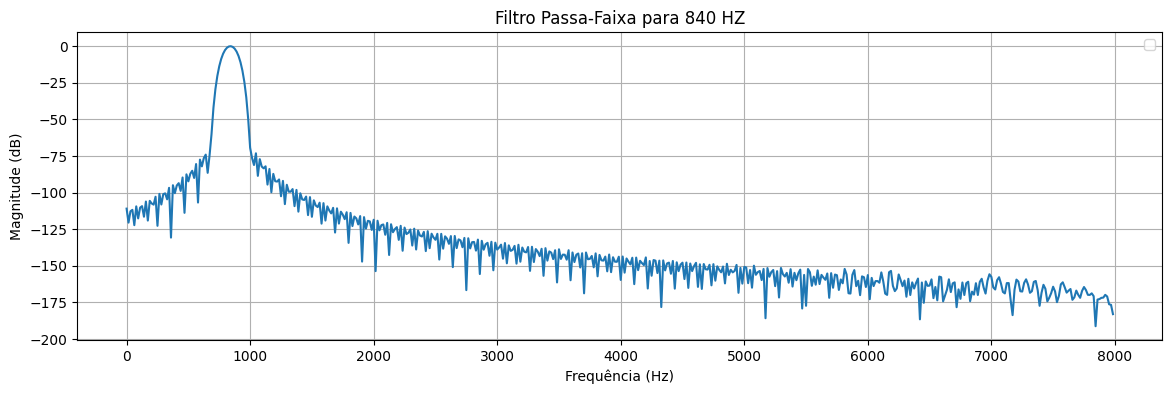

In [85]:
# Resposta em frequência
w, H = freqz(h2, fs=fs)
plt.figure(figsize=(14, 4))
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Filtro Passa-Faixa para 840 HZ')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.xlim([0,1000])
plt.grid(True)
plt.legend()
plt.show()

# Filtro para 2000 Hz

![h3](img/h3.png)

<StemContainer object of 3 artists>

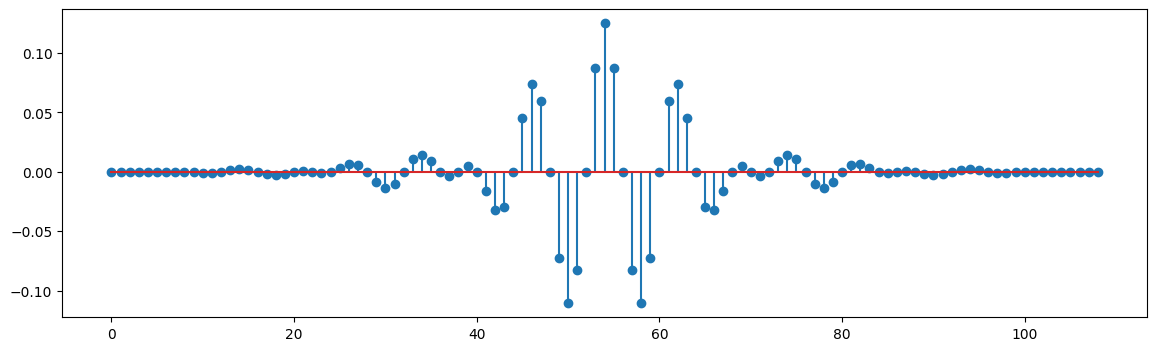

In [86]:
h3 = np.array([2.761752889076601e-19,7.661055860808119e-05,0.00012945452181156725,9.698480425868183e-05,-3.94548944617667e-19,-5.698961831512861e-05,1.1116922793727855e-18,8.843737305141985e-05,1.3029562893297468e-19,-0.00037099208566360176,-0.0007982805836945772,-0.0007867644308134913,-6.991071009381001e-19,0.00127569236792624,0.002136178547516465,0.0017109077889472246,-3.068331770085319e-18,-0.0019059552578255534,-0.0026103425770998,-0.001644945121370256,1.8388109211768048e-18,0.0007352731772698462,-1.4658455227343015e-18,-0.0009243633830919862,2.4921996462615225e-18,0.00327457208186388,0.006551441736519337,0.006042784079909325,-1.76896858790038e-17,-0.008726293221116066,-0.013892009854316711,-0.010624761693179607,-3.2794801679922892e-18,0.010926799848675728,0.014463569037616253,0.008842888288199902,-5.501513320412102e-18,-0.0037643127143383026,3.684112728620313e-18,0.004581906832754612,-6.119672836798492e-18,-0.016015907749533653,-0.03209836035966873,-0.02985590137541294,1.586242736226191e-17,0.04495616629719734,0.0742797926068306,0.059834495186805725,-3.68308983707483e-17,-0.07287280261516571,-0.11061734706163406,-0.08255795389413834,-0.0,0.08771945536136627,0.1249883770942688,0.08771945536136627,0.0,-0.08255795389413834,-0.11061734706163406,-0.07287280261516571,-3.68308983707483e-17,0.059834495186805725,0.0742797926068306,0.04495616629719734,1.586242736226191e-17,-0.02985590137541294,-0.03209836035966873,-0.016015907749533653,-6.119672836798492e-18,0.004581906832754612,3.684112728620313e-18,-0.0037643127143383026,-5.501513320412102e-18,0.008842888288199902,0.014463569037616253,0.010926799848675728,-3.2794801679922892e-18,-0.010624761693179607,-0.013892009854316711,-0.008726293221116066,-1.76896858790038e-17,0.006042784079909325,0.006551441736519337,0.00327457208186388,2.4921996462615225e-18,-0.0009243633830919862,-1.4658455227343015e-18,0.0007352731772698462,1.8388109211768048e-18,-0.001644945121370256,-0.0026103425770998,-0.0019059552578255534,-3.068331770085319e-18,0.0017109077889472246,0.002136178547516465,0.00127569236792624,-6.991071009381001e-19,-0.0007867644308134913,-0.0007982805836945772,-0.00037099208566360176,1.3029562893297468e-19,8.843737305141985e-05,1.1116922793727855e-18,-5.698961831512861e-05,-3.94548944617667e-19,9.698480425868183e-05,0.00012945452181156725,7.661055860808119e-05,2.761752889076601e-19])

# filtro de ordem n = 109
plt.figure(figsize=(14, 4))
plt.stem(h3)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16140\3963306610.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


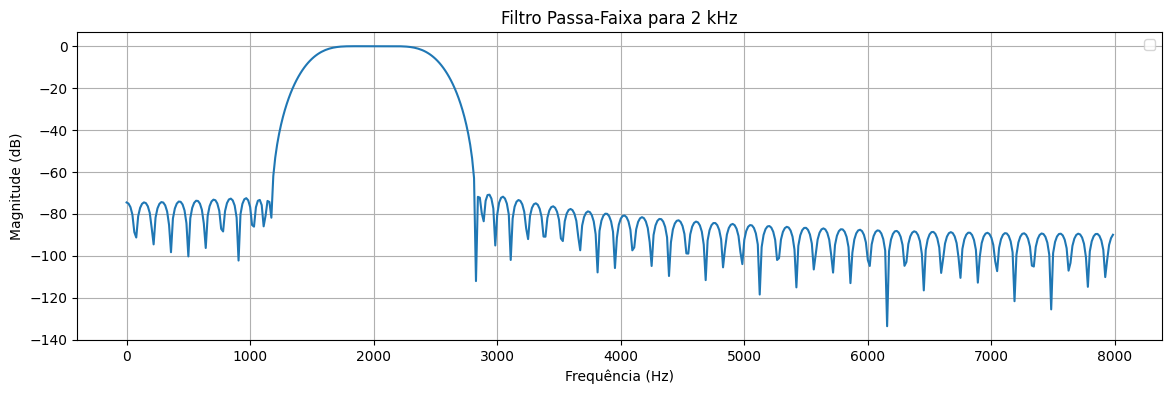

In [87]:
# Resposta em frequência
w, H = freqz(h3, fs=fs)
plt.figure(figsize=(14, 4))
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Filtro Passa-Faixa para 2 kHz')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.xlim([0,1000])
plt.grid(True)
plt.legend()
plt.show()

# Filtro para 4000 Hz

![h4](img/h4.png)

<StemContainer object of 3 artists>

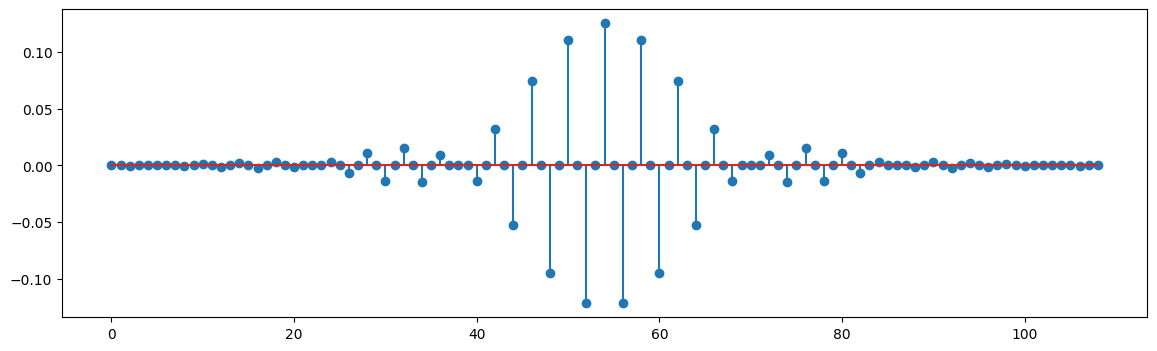

In [88]:
h4 = np.array([8.064366556936875e-05,-1.5914218277787197e-19,-0.00012946201604790986,6.715544385169948e-19,0.00012364107533358037,-9.173613292737219e-20,2.0329818506014305e-18,-6.050195455608326e-19,-0.0002994285605382174,2.3591664630913036e-18,0.0007983268587850034,-9.657442219011996e-19,-0.0014545009471476078,1.327503804585447e-18,0.002136302413418889,-1.4722498652294168e-18,-0.002618954749777913,1.0797867650937576e-17,0.002610493917018175,-6.973552874970777e-19,-0.0018110217060893774,2.9589214693423307e-19,-1.4659304121446648e-18,4.835826901160558e-18,0.0028636250644922256,-1.665859862801155e-17,-0.0065518212504684925,-1.1411455960463846e-18,0.010515316389501095,-4.0863175555095246e-17,-0.01389281451702118,4.7839673089649135e-17,0.015595425851643085,8.253857133418489e-18,-0.014464407227933407,1.4995356791849125e-17,0.009482148103415966,-4.5445579959168546e-18,3.684326141218352e-18,-7.375491411741292e-18,-0.014063439331948757,1.8106020770552764e-17,0.032100219279527664,8.457178127984023e-18,-0.0528031587600708,3.5086523351384225e-17,0.07428409904241562,-3.592190628689133e-17,-0.09431032091379166,2.752323712517502e-17,0.11062376201152802,-2.3332986641803922e-17,-0.12128747254610062,-0.0,0.12499561905860901,0.0,-0.12128747254610062,-2.3332986641803922e-17,0.11062376201152802,2.752323712517502e-17,-0.09431032091379166,-3.592190628689133e-17,0.07428409904241562,3.5086523351384225e-17,-0.0528031587600708,8.457178127984023e-18,0.032100219279527664,1.8106020770552764e-17,-0.014063439331948757,-7.375491411741292e-18,3.684326141218352e-18,-4.5445579959168546e-18,0.009482148103415966,1.4995356791849125e-17,-0.014464407227933407,8.253857133418489e-18,0.015595425851643085,4.7839673089649135e-17,-0.01389281451702118,-4.0863175555095246e-17,0.010515316389501095,-1.1411455960463846e-18,-0.0065518212504684925,-1.665859862801155e-17,0.0028636250644922256,4.835826901160558e-18,-1.4659304121446648e-18,2.9589214693423307e-19,-0.0018110217060893774,-6.973552874970777e-19,0.002610493917018175,1.0797867650937576e-17,-0.002618954749777913,-1.4722498652294168e-18,0.002136302413418889,1.327503804585447e-18,-0.0014545009471476078,-9.657442219011996e-19,0.0007983268587850034,2.3591664630913036e-18,-0.0002994285605382174,-6.050195455608326e-19,2.0329818506014305e-18,-9.173613292737219e-20,0.00012364107533358037,6.715544385169948e-19,-0.00012946201604790986,-1.5914218277787197e-19,8.064366556936875e-05])

# filtro de ordem n = 109
plt.figure(figsize=(14, 4))
plt.stem(h4)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16140\1492647340.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


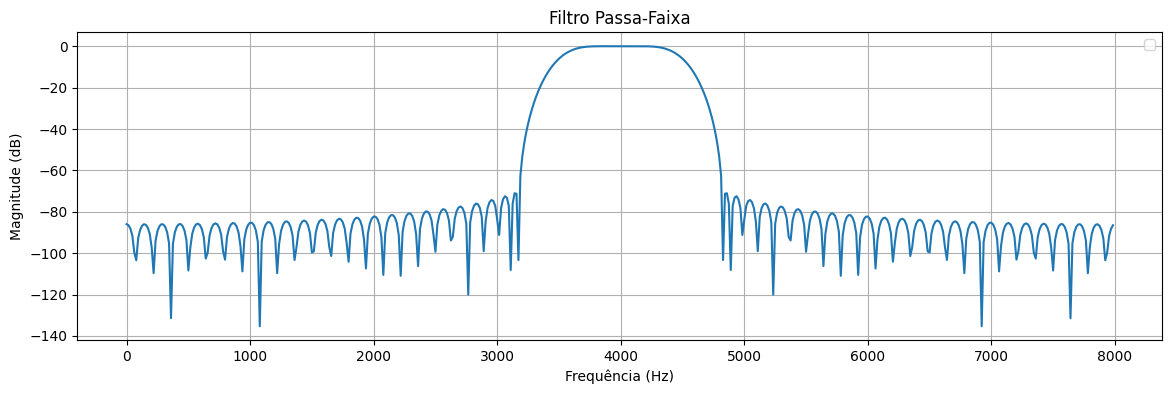

In [89]:
# Resposta em frequência
w, H = freqz(h4, fs=fs)
plt.figure(figsize=(14, 4))
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Filtro Passa-Faixa')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.xlim([0,1000])
plt.grid(True)
plt.legend()
plt.show()

In [90]:
# Filtragem (convolução)
y1 = overlap_add(x_sem_dc, h1)
y2 = overlap_add(x_sem_dc, h2)
y3 = overlap_add(x_sem_dc, h3)
y4 = overlap_add(x_sem_dc, h4)


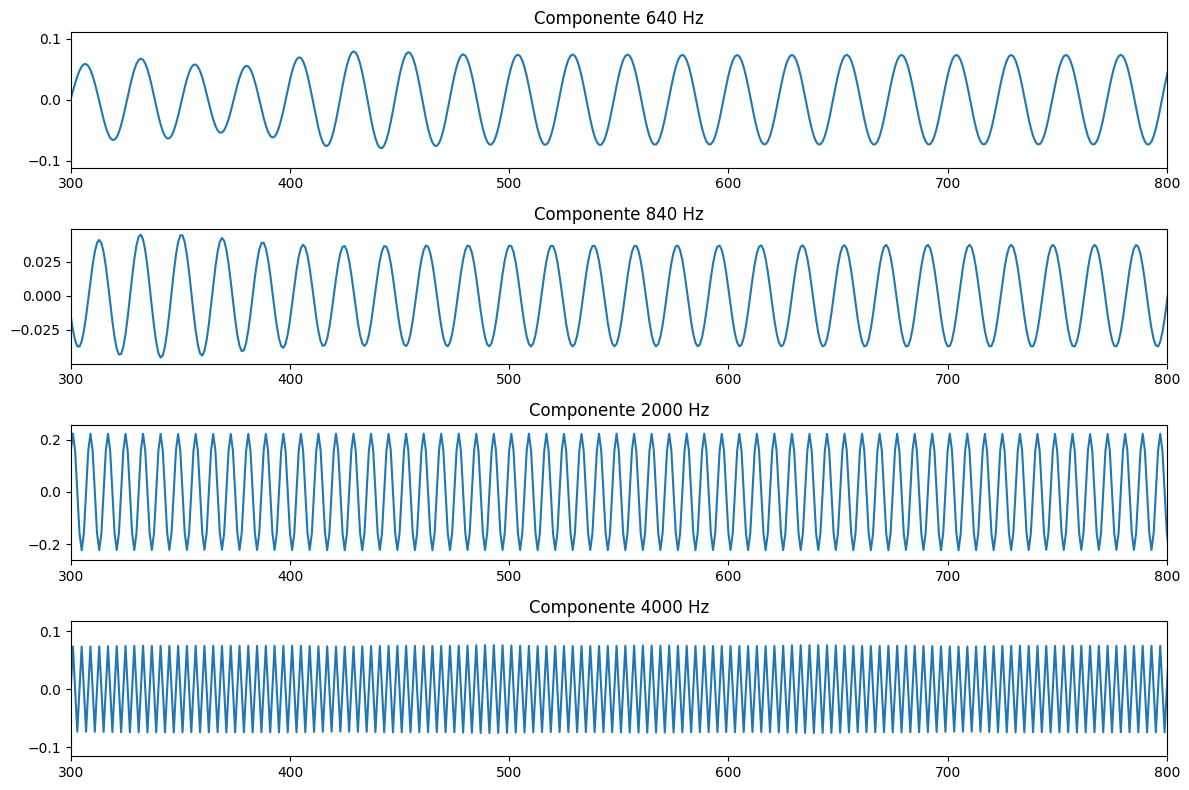

In [91]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(y1)
plt.title('Componente 640 Hz')
plt.xlim([300, 800])

plt.subplot(4, 1, 2)
plt.plot(y2)
plt.title('Componente 840 Hz')
plt.xlim([300, 800])

plt.subplot(4, 1, 3)
plt.plot(y3)
plt.title('Componente 2000 Hz')
plt.xlim([300, 800])

plt.subplot(4, 1, 4)
plt.plot(y4)
plt.title('Componente 4000 Hz')
plt.xlim([300, 800])

plt.tight_layout()
plt.show()

In [92]:
y1 = zero_padding(y1)
Y1 = fft_dec(y1)

y2 = zero_padding(y2)
Y2 = fft_dec(y2)

y3 = zero_padding(y3)
Y3 = fft_dec(y3)

y4 = zero_padding(y4)
Y4 = fft_dec(y4)


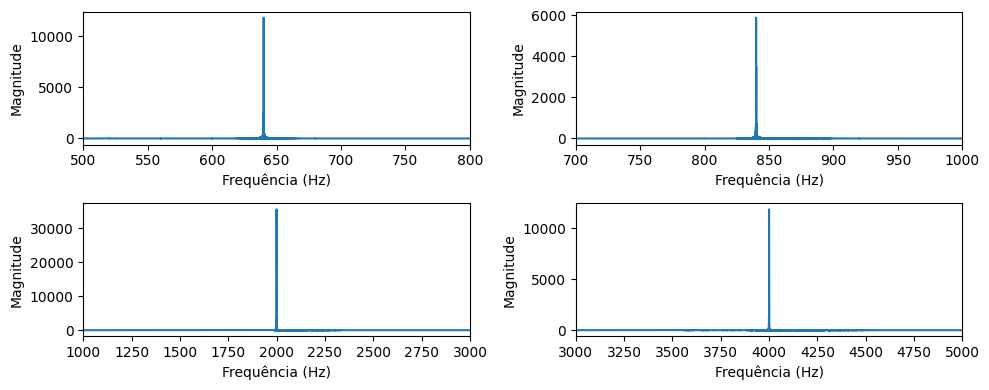

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(2, 2, 1)
plt.plot(freqs[:len(y1)//2], np.abs(Y1[:len(y1)//2]))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([500, 800])

plt.subplot(2, 2, 2)
plt.plot(freqs[:len(y2)//2], np.abs(Y2[:len(y1)//2]))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([700, 1000])

plt.subplot(2, 2, 3)
plt.plot(freqs[:len(y3)//2], np.abs(Y3[:len(y1)//2]))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([1000, 3000])

plt.subplot(2, 2, 4)
plt.plot(freqs[:len(y4)//2], np.abs(Y4[:len(y1)//2]))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([3000, 5000])
plt.tight_layout()
plt.show()
